In [1]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.util import *
import ProbabilisticParcellation.individ_group as ig
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
    

## Calculate the individual-group analysis and save as file

In [2]:
info,model = load_batch_best('Models_01/asym_Md_space-MNISymC3_K-20')
D = ig.individ_group(model)
fname = base_dir+ '/Models/Evaluation_01/indivgroup_prederr_Md_K-20.tsv'
D.to_csv(fname,sep='\t',index=False)


Subject:0
Subject:1
Subject:2
Subject:3
Subject:4
Subject:5
Subject:6
Subject:7
Subject:8
Subject:9
Subject:10
Subject:11
Subject:12
Subject:13
Subject:14
Subject:15
Subject:16
Subject:17
Subject:18
Subject:19
Subject:20
Subject:21
Subject:22
Subject:23


## Load results and plot Figure

In [3]:
fname = base_dir+ '/Models/Evaluation_01/indivgroup_prederr_Md_K-20.tsv'
D = pd.read_csv(fname,sep='\t')
D

,type,runs,coserr,subject
0,emissionOnly,1,0.760188,1
1,emissionAndPrior,1,0.596488,1
2,emissionOnly,2,0.692374,1
3,emissionAndPrior,2,0.567362,1
4,emissionOnly,3,0.655426,1
...,...,...,...,...
787,emissionOnly,15,0.584605,24
788,emissionAndPrior,15,0.533992,24
789,emissionOnly,16,0.578605,24
790,emissionAndPrior,16,0.530627,24


In [ ]:
D.

The analysis compares the cross-validated error on MDTB ses-s2, depending on different parcellations: 

* emissionOnly: Based only on the individual data, based only on data from 1-16 runs (10-160min of scanning) This would be what you get with an individual functional localizer
* group: dashed line. Just based on the group maps
* emissionAndPrior: Integration of group prior and individual parcellation 

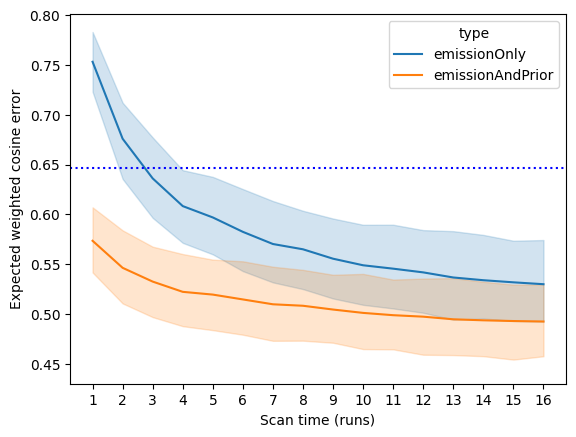

In [31]:
gm = D.coserr[D.type=='group'].mean()
sb.lineplot(data=D[D.type!='group'],
    y='coserr',x='runs',hue='type',markers=True, dashes=False)
plt.xticks(ticks=np.arange(16)+1)
plt.axhline(gm,color='b',ls=':')
plt.ylim((0.43,0.801))
plt.ylabel('Expected weighted cosine error')
plt.xlabel('Scan time (runs)')

plt.ylim((0.43,0.801))
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/indiv_localizer_indiv_group.png", dpi=100)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_80820/4227332066.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.lineplot(data=D.query('type == "emissionOnly"')[D.type!='group'],


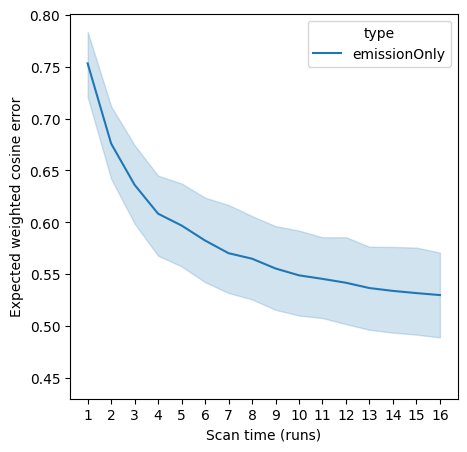

In [29]:
fig = plt.figure(figsize=(5,5))
gm = D.coserr[D.type=='group'].mean()
sb.lineplot(data=D.query('type == "emissionOnly"')[D.type!='group'],
    y='coserr',x='runs',hue='type',markers=True, dashes=False)
plt.xticks(ticks=np.arange(16)+1)
plt.ylabel('Expected weighted cosine error')
plt.xlabel('Scan time (runs)')

plt.ylim((0.43,0.801))
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/indiv_localizer_indiv_group_1.png", dpi=500)


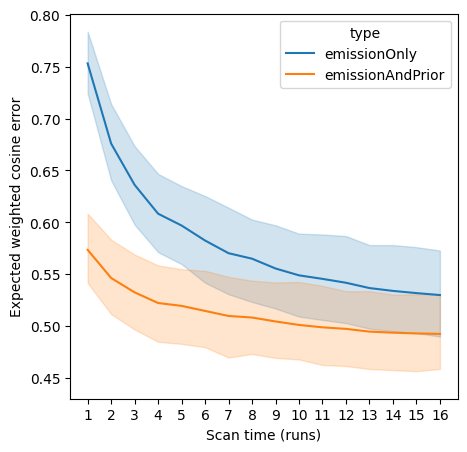

In [30]:
fig = plt.figure(figsize=(5,5))
gm = D.coserr[D.type=='group'].mean()
sb.lineplot(data=D[D.type!='group'],
    y='coserr',x='runs',hue='type',markers=True, dashes=False)
plt.xticks(ticks=np.arange(16)+1)
plt.ylim((0.43,0.801))
plt.ylabel('Expected weighted cosine error')
plt.xlabel('Scan time (runs)')
plt.savefig("/Users/callithrix/Documents/Conferences/SfN22/minisymposium/slides/figures/indiv_localizer_indiv_group_2.png", dpi=500)
